In [2]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from IPython.display import display
init_printing()
%matplotlib inline

In [3]:
P=Symbol('P')
f=.3*(1-P/2500)*P-100
y=f.expand()

In [4]:
solve(y,P)

In [169]:
x=[50.2,226.5]
y=[0.02430,0.01002]
A=np.vstack([x, np.ones(len(x))]).T
m1, c1 = np.linalg.lstsq(A, y)[0]
m1, c1

In [172]:
k=c1
N=-c1/m1


In [189]:
p = symbols('p', cls=Function)
t=Symbol('t')
def pn(tn,k,N):
    #print "stat"
    if tn>1.:
        return (k*pn(tn-1,k,N)*(1.-pn(tn-1,k,N)/N))
    if tn<=1.:
        return 1
    

In [279]:
def Pt(x,k,N):
    return k*(x)*(1-(x/N))
def gen(t0,k,N,t):
    p=np.zeros(len(t))
    p[0]=t0
    for i in range(1,len(t)):
        p[i]=(Pt(p[i-1],k,N))
    return p
def gen1(m1,c1,t,y):
    p=np.zeros(len(t))
    #p[0]=t0
    cnt=0;
    for i in t:
        p[cnt]=y[cnt]*(y[cnt]*((m1)*y[cnt]+c1))
        cnt+=1
    return p

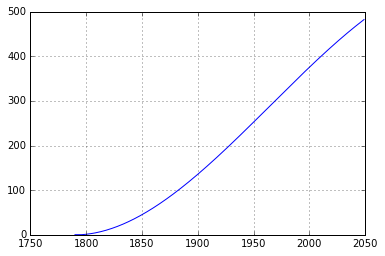

In [373]:
from scipy.integrate import quad
def integrand(x,m1,c1):
    return x*(m1*x+c1)

yy=[abs(quad(integrand, 3.9,i , args=(m1,c1))[0]) for i in tr]
plt.plot(t,yy);
plt.grid()
#plt.ylim([0,600])
#quad(integrand, 0,oo, args=(m1,c1))
yy[0:2]

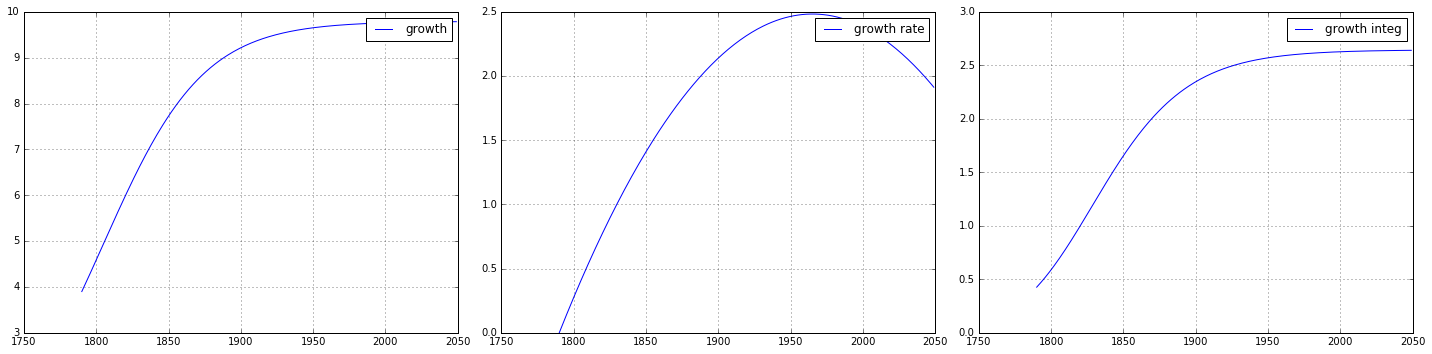

In [371]:
it=500
t = range(1790,2050)#xrange(1790,2100,1)
tr=range(0,len(t))
y=gen(3.9,exp(k),N,t)
z=[Pt(i,k,N) for i in tr]
w=gen1(m1,c1,t,y)
ax=plt.figure(figsize=(20,5))

plt.subplot(131)
plt.plot(t,y)
plt.legend(['growth'])
plt.grid()
plt.subplot(132)
plt.plot(t,z)
plt.legend(['growth rate'])
plt.grid()
plt.subplot(133)
plt.plot(t,w)
plt.legend(['growth integ'])
plt.grid()
ax.tight_layout()

In [274]:
1/m1

In [11]:
diffeq =p(t).diff()/p(t)-m1*p(t)-c1 #Eq(p(t).diff(t),p(t)*(m1*p(t)+c1))

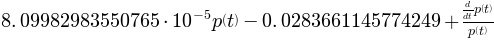

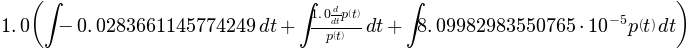

In [16]:
display(diffeq)
integrate(diffeq)

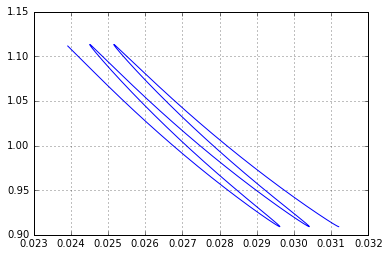

In [89]:
import numpy as np
import matplotlib.pyplot as plt

from numpy import sqrt, pi, sin, cos
from scipy.integrate import ode

# use z = [z1, z2] = [u, u']
# and then f = z' = [u', u''] = [z2, -z1+sqrt(z1)]
def f(phi, z):
    return [z[1], -z[0]+sqrt(z[0])]


# initialize the 4th order Runge-Kutta solver
solver = ode(f).set_integrator('dopri5')

# initial value
z0 = [1.1, 0.]
solver.set_initial_value(z0)

values = 1000
phi = np.linspace(0.0001, 7.*pi, values)
u = np.zeros(values)

for ii in range(values):
    u[ii] = solver.integrate(phi[ii])[0] #z[0]=u

x =u*(m1*phi+c1)
y = 1. / u 

plt.figure()
plt.plot(x,y)
plt.grid()
plt.show()

In [81]:
y.evalf()

AttributeError: 'numpy.ndarray' object has no attribute 'evalf'

In [16]:
f.evalf(subs={t:0})

C1*sin(sqrt(356719280385411797993)*t/2098579103331)

ODE:


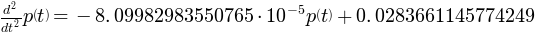

Generic solution:
C1*sin(sqrt(356719280385411797993)*t/2098579103331) + C2*cos(sqrt(356719280385411797993)*t/2098579103331) + 350.206302521009


'\n# Initial conditions:\ncnd0 = sy.Eq(p_sl0.subs(t, 0), a0)  # y(0) = a0\ncnd1 = sy.Eq(p_sl0.diff(t).subs(t, 0), b0)  # y\'(0) = b0\n\n#  Solve for C1, C2:\nC1, C2 = sy.symbols("C1, C2")  # generic constants\nC1C2_sl = sy.solve([cnd0, cnd1], (C1, C2))\n\n# Substitute back into solution:\np_sl1 = sy.simplify(p_sl0.subs(C1C2_sl))\nprint("Solution with initial conditions:")\ndisplay(sy.Eq(p(t), p_sl1))'

In [15]:
from IPython.display import display
import sympy as sy

sy.init_printing()  # LaTeX-like pretty printing for IPython

t = sy.Symbol("t", real=True)
m, k = sy.symbols('m k', real=True)  # gives C_1 Exp() + C_2 Exp() solution
# m, k = sy.symbols('m k', positive=True)  # gives C_1 sin() + C_2 cos() sol.
a0, b0 = sy.symbols('a0, b0', real=True)
p = symbols('p', cls=Function)
t=Symbol('t')

Eq1 = Eq(p(t).diff(t, t) , m1*p(t)+c1)
print("ODE:")
display(Eq1)

print("Generic solution:")
p_sl0 = sy.dsolve(Eq1, p(t)).rhs  # take only right hand side
print p_sl0
#display(sy.Eq(p(t), p_sl0))
'''
# Initial conditions:
cnd0 = sy.Eq(p_sl0.subs(t, 0), a0)  # y(0) = a0
cnd1 = sy.Eq(p_sl0.diff(t).subs(t, 0), b0)  # y'(0) = b0

#  Solve for C1, C2:
C1, C2 = sy.symbols("C1, C2")  # generic constants
C1C2_sl = sy.solve([cnd0, cnd1], (C1, C2))

# Substitute back into solution:
p_sl1 = sy.simplify(p_sl0.subs(C1C2_sl))
print("Solution with initial conditions:")
display(sy.Eq(p(t), p_sl1))'''

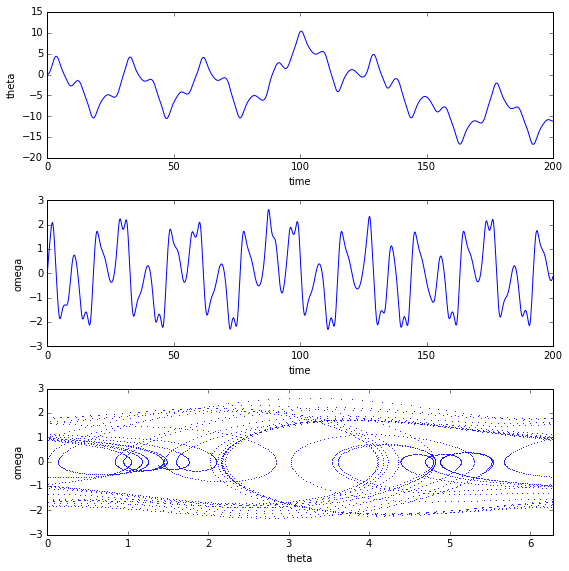

In [98]:

import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    theta, omega = y      # unpack current values of y
    Q, d, Omega = params  # unpack parameters
    derivs = [omega,      # list of dy/dt=f functions
             -omega/Q + np.sin(theta) + d*np.cos(Omega*t)]
    return derivs

# Parameters
Q = 2.0          # quality factor (inverse damping)
d = 1.5          # forcing amplitude
Omega = 0.65     # drive frequency

# Initial values
theta0 = 0.0     # initial angular displacement
omega0 = 0.0     # initial angular velocity

# Bundle parameters for ODE solver
params = [Q, d, Omega]

# Bundle initial conditions for ODE solver
y0 = [theta0, omega0]

# Make time array for solution
tStop = 200.
tInc = 0.05
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('theta')

# Plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('omega')

# Plot omega vs theta
ax3 = fig.add_subplot(313)
twopi = 2.0*np.pi
ax3.plot(psoln[:,0]%twopi, psoln[:,1], '.', ms=1)
ax3.set_xlabel('theta')
ax3.set_ylabel('omega')
ax3.set_xlim(0., twopi)

plt.tight_layout()
plt.show()